# Types of Analysis

1. Human Female vs AI Female
2. Human Male vs AI Male
3. Human Female vs Human Male
4. AI Female vs AI Male

- t-test for Human Male vs Human Females
- t-test for AI Females vs AI Males
- Correlation for LLM Female vs Human Female
- Correlation for LLM Male vs Human Male



In [1]:
import pandas as pd

Reading Data

In [3]:
df = pd.read_csv('/mnt/disks/data-disk/paper_data/dataframe_liwc_all_llms.csv')

In [5]:
print("No of data points: ",len(df))

No of data points:  3390


In [6]:
columns = ['Segment',
 'WC',
 'Analytic',
 'Clout',
 'Tone',
 'affiliation',
 'achieve',
 'power',
 'insight',
 'cause',
 'discrep',
 'tentat',
 'certitude',
 'differ',
 'tone_pos',
 'tone_neg',
 'emotion',
 'emo_pos',
 'emo_neg',
 'emo_anx',
 'emo_anger',
 'emo_sad',
 'prosocial',
 'polite',
 'conflict',
 'moral',
 'comm',
 'politic',
 'ethnicity',
 'tech',
 'reward',
 'risk',
 'curiosity',
 'allure',
]

In [7]:
df.head()

,Unnamed: 0.1,Unnamed: 0,oai,abstract,genders,gender_flags,mistral,claude,gemini,Segment,...,tech_mistral,reward_mistral,risk_mistral,curiosity_mistral,allure_mistral,Conversation_mistral,netspeak_mistral,assent_mistral,nonflu_mistral,filler_mistral
0,0,0,oai:aura.abdn.ac.uk:2164/147,"Contrary to the epidemiological literature, so...","['male', 'male']",1,Rewritten document:\n\nPrevious research in e...,Title: The Impact of Unemployment on Mortality...,## Unemployment and Mortality: A New Look at t...,1,...,0.00,0.00,0.00,1.03,1.03,0.0,0.0,0.0,0.0,0.0
1,1,1,oai:aura.abdn.ac.uk:2164/48,This paper analyses data on the daily work dec...,"['male', 'male']",1,Title: Examining Intertemporal Labor Supply B...,Title: Intertemporal Labor Supply Behavior: Ev...,## Examining Labor Supply Decisions in Archaeo...,1,...,0.00,2.08,0.00,2.08,1.04,0.0,0.0,0.0,0.0,0.0
2,2,2,oai:aura.abdn.ac.uk:2164/187,We compared three approaches to feedback of cl...,"['male', 'male', 'mostly female', 'female', 'm...",2,Title: Comparing the Effectiveness of Three F...,Title: Comparing Feedback Approaches for Clini...,## Impact of Feedback Methods on Clinical Aud...,1,...,0.00,0.38,0.38,0.00,0.38,0.0,0.0,0.0,0.0,0.0
3,3,3,oai:aura.abdn.ac.uk:2164/207,Background: This study was undertaken to inves...,"['female', 'female', 'female']",0,Title: Womens Experiences and Perceptions of ...,Title: Exploring Women's Interactions with Hea...,## Women's Experiences of Maternity Care in Gh...,1,...,0.00,0.59,0.59,1.47,1.47,0.0,0.0,0.0,0.0,0.0
4,4,4,oai:aura.abdn.ac.uk:2164/255,Objective To compare the effectiveness and ris...,"['female', 'male', 'male', 'male', 'female', '...",2,Title: Comparing the Effectiveness and Risks ...,Title: Comparing Newer Endoscopic Prostate Abl...,## Newer Endoscopic Ablation Techniques for B...,1,...,2.16,0.00,0.62,0.93,1.85,0.0,0.0,0.0,0.0,0.0


## Human Female vs Human Male - not same number

## t-test

In [8]:
import numpy as np
from scipy import stats

In [9]:
humans = pd.DataFrame(df[columns])

In [10]:
mistral,claude,gemini  = pd.DataFrame(df[[x+'_mistral' for x in columns]]),pd.DataFrame(df[[x+'_claude' for x in columns]]),pd.DataFrame(df[[x+'_gemini' for x in columns]])

In [11]:
females,males = df[df['gender_flags']==0], df[df['gender_flags']==1]

In [23]:
t_statistic_res = []
models = ['','_mistral','_gemini','_claude']
for model in models:
    human_f, human_m = females[[x+model for x in columns]], males[[x+model for x in columns]]
    results = {'feature': [], 't_statistic': [], 'p_value': []}
    for feature in [x+model for x in columns]:
        t_statistic, p_value = stats.ttest_ind(males[feature], females[feature])
        results['feature'].append(feature)
        results['t_statistic'].append(t_statistic)
        results['p_value'].append(p_value)
    t_statistic_res.append(results)




/home/naseelapervez/miniconda3/envs/torch-dev/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)
/home/naseelapervez/miniconda3/envs/torch-dev/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)
/home/naseelapervez/miniconda3/envs/torch-dev/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)
/home/naseelapervez/mi

the t-test for males vs females - humans and LLMs

In [24]:
for i,res in enumerate(t_statistic_res):
    if i==0:
        print('Humans\n')
    else:
        print(models[i])
    print(pd.DataFrame(t_statistic_res[i]))

Humans

        feature  t_statistic       p_value
0       Segment          NaN           NaN
1            WC    -5.866749  5.572182e-09
2      Analytic    -1.136096  2.561164e-01
3         Clout    -0.714667  4.749375e-01
4          Tone     3.929429  8.941941e-05
5   affiliation     0.194492  8.458195e-01
6       achieve    -0.782524  4.340427e-01
7         power    -0.422666  6.726055e-01
8       insight    -6.742126  2.299138e-11
9         cause    -2.270210  2.335052e-02
10      discrep    -0.350580  7.259574e-01
11       tentat    -0.308561  7.577025e-01
12    certitude    -0.013933  9.888852e-01
13       differ    -3.200007  1.405930e-03
14     tone_pos     3.884204  1.075916e-04
15     tone_neg    -1.258213  2.085303e-01
16      emotion     3.329982  8.917480e-04
17      emo_pos     3.823359  1.375905e-04
18      emo_neg     0.956716  3.388804e-01
19      emo_anx    -0.088775  9.292738e-01
20    emo_anger    -0.309244  7.571833e-01
21      emo_sad     1.074422  2.828238e-01
22 

In [25]:
humans

,Segment,WC,Analytic,Clout,Tone,affiliation,achieve,power,insight,cause,...,conflict,moral,comm,politic,ethnicity,tech,reward,risk,curiosity,allure
0,1,71,95.35,48.42,20.23,1.41,0.00,2.82,4.23,8.45,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.41
1,1,74,97.53,71.32,7.88,1.35,1.35,5.41,6.76,2.70,...,1.35,0.00,1.35,0.00,1.35,0.00,0.00,0.00,1.35,1.35
2,1,189,92.72,43.17,27.21,2.12,2.65,2.65,10.05,4.76,...,0.00,0.00,3.70,0.00,0.53,0.00,0.00,0.00,0.00,1.59
3,1,323,86.75,60.32,99.00,1.24,2.48,1.24,4.33,2.79,...,0.00,0.62,1.24,0.31,0.31,0.00,0.31,0.31,0.62,2.79
4,1,350,96.69,29.01,50.98,0.57,1.71,1.43,2.86,4.00,...,0.00,0.00,0.86,0.29,0.29,1.71,0.00,0.57,1.43,2.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,1,298,93.43,44.02,1.00,1.01,0.00,4.03,2.35,1.34,...,1.68,0.00,0.67,1.34,0.34,0.00,0.00,1.68,0.67,2.01
3386,1,314,96.65,72.96,96.09,4.78,1.59,0.96,3.50,2.55,...,0.00,0.64,5.41,0.00,0.00,0.00,0.00,0.32,0.96,1.91
3387,1,206,97.64,34.53,66.14,2.91,1.46,2.43,2.91,2.91,...,0.49,0.00,0.49,0.49,0.00,0.00,0.49,0.00,0.49,0.97
3388,1,456,95.72,7.97,57.97,0.66,2.41,0.88,3.51,1.75,...,0.00,0.00,0.22,0.00,0.00,0.00,0.88,0.22,0.22,2.41


## Correlation Analysis for Humans vs LLMs

In [39]:
all_models_data = [claude, gemini, mistral]
names = ['claude','gemini','mistral']

for i,data in enumerate(all_models_data):
    humans_c = pd.concat([humans,data],axis=1)
    print(f'Correlation Matrix for {names[i]}')
    display(humans_c.corr())

Correlation Matrix for claude


,Segment,WC,Analytic,Clout,Tone,affiliation,achieve,power,insight,cause,...,conflict_claude,moral_claude,comm_claude,politic_claude,ethnicity_claude,tech_claude,reward_claude,risk_claude,curiosity_claude,allure_claude
Segment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WC,NaN,1.000000,0.007579,-0.238346,-0.322125,-0.186771,0.021003,0.080797,0.111773,0.254572,...,0.086617,-0.046391,0.006991,0.000755,-0.001495,-0.011961,-0.047346,0.135491,-0.333590,-0.035807
Analytic,NaN,0.007579,1.000000,-0.056816,-0.013910,-0.111621,-0.016967,-0.038299,-0.112285,-0.072115,...,-0.031839,-0.053976,-0.084981,0.026515,0.074981,0.007690,-0.018699,-0.020163,0.075130,-0.127986
Clout,NaN,-0.238346,-0.056816,1.000000,0.442984,0.616655,-0.009563,-0.072802,-0.138289,-0.287266,...,-0.045753,0.107393,0.113986,-0.039379,0.059941,-0.061532,0.049531,-0.112306,0.203170,0.011797
Tone,NaN,-0.322125,-0.013910,0.442984,1.000000,0.372595,0.096764,-0.214515,-0.260109,-0.370043,...,-0.222019,0.109103,0.036693,-0.088113,0.033738,-0.090740,0.120045,-0.223627,0.368495,0.075520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tech_claude,NaN,-0.011961,0.007690,-0.061532,-0.090740,-0.071524,0.107390,-0.047362,0.191371,0.181690,...,-0.022711,-0.093503,0.062268,-0.086928,-0.124721,1.000000,0.075359,-0.034948,-0.059566,0.052616
reward_claude,NaN,-0.047346,-0.018699,0.049531,0.120045,0.035605,0.298444,0.006183,0.056791,0.006466,...,-0.044529,0.018779,-0.053114,-0.042347,-0.078653,0.075359,1.000000,-0.030094,0.015769,0.020144
risk_claude,NaN,0.135491,-0.020163,-0.112306,-0.223627,-0.083161,0.004209,0.121828,0.023468,0.101329,...,0.126076,-0.012397,-0.064057,-0.001955,-0.038340,-0.034948,-0.030094,1.000000,-0.166483,0.035977
curiosity_claude,NaN,-0.333590,0.075130,0.203170,0.368495,0.177875,-0.001159,-0.161008,-0.227591,-0.367460,...,-0.095750,0.050974,-0.085099,0.024840,0.141488,-0.059566,0.015769,-0.166483,1.000000,-0.008407


Correlation Matrix for gemini


,Segment,WC,Analytic,Clout,Tone,affiliation,achieve,power,insight,cause,...,conflict_gemini,moral_gemini,comm_gemini,politic_gemini,ethnicity_gemini,tech_gemini,reward_gemini,risk_gemini,curiosity_gemini,allure_gemini
Segment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WC,NaN,1.000000,0.007579,-0.238346,-0.322125,-0.186771,0.021003,0.080797,0.111773,0.254572,...,0.099010,-0.087991,-0.007625,-0.040918,-0.070589,-0.035432,0.013171,0.157389,-0.317080,0.019381
Analytic,NaN,0.007579,1.000000,-0.056816,-0.013910,-0.111621,-0.016967,-0.038299,-0.112285,-0.072115,...,-0.049574,-0.023111,-0.090977,0.039346,0.080166,0.009091,-0.014510,-0.025010,0.081169,-0.086066
Clout,NaN,-0.238346,-0.056816,1.000000,0.442984,0.616655,-0.009563,-0.072802,-0.138289,-0.287266,...,-0.040150,0.197794,0.121682,-0.035949,0.080342,-0.040018,-0.016629,-0.118071,0.146777,-0.120896
Tone,NaN,-0.322125,-0.013910,0.442984,1.000000,0.372595,0.096764,-0.214515,-0.260109,-0.370043,...,-0.233808,0.194939,0.064992,-0.048543,0.074820,-0.056253,0.063557,-0.225601,0.314998,-0.040884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tech_gemini,NaN,-0.035432,0.009091,-0.040018,-0.056253,-0.066140,0.100219,-0.071463,0.172153,0.137343,...,-0.038290,-0.091019,0.078217,-0.073891,-0.116311,1.000000,0.038251,-0.050058,0.021845,0.123297
reward_gemini,NaN,0.013171,-0.014510,-0.016629,0.063557,-0.011892,0.322334,0.021226,0.049047,0.053338,...,-0.024267,-0.048762,-0.039974,-0.057307,-0.074350,0.038251,1.000000,-0.003233,-0.003419,0.018018
risk_gemini,NaN,0.157389,-0.025010,-0.118071,-0.225601,-0.087838,-0.009910,0.107797,0.039661,0.113867,...,0.112582,-0.033168,-0.047547,-0.034564,-0.055021,-0.050058,-0.003233,1.000000,-0.159077,0.056852
curiosity_gemini,NaN,-0.317080,0.081169,0.146777,0.314998,0.136062,-0.006360,-0.152233,-0.211579,-0.341323,...,-0.109508,0.051442,-0.104283,0.083177,0.235519,0.021845,-0.003419,-0.159077,1.000000,-0.030865


Correlation Matrix for mistral


,Segment,WC,Analytic,Clout,Tone,affiliation,achieve,power,insight,cause,...,conflict_mistral,moral_mistral,comm_mistral,politic_mistral,ethnicity_mistral,tech_mistral,reward_mistral,risk_mistral,curiosity_mistral,allure_mistral
Segment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WC,NaN,1.000000,0.007579,-0.238346,-0.322125,-0.186771,0.021003,0.080797,0.111773,0.254572,...,0.073266,-0.057566,0.005907,-0.018009,-0.051817,-0.036342,0.002155,0.153343,-0.267680,-0.006757
Analytic,NaN,0.007579,1.000000,-0.056816,-0.013910,-0.111621,-0.016967,-0.038299,-0.112285,-0.072115,...,-0.039046,-0.049127,-0.090600,0.033826,0.074150,0.011046,-0.007342,-0.023522,0.078782,-0.074862
Clout,NaN,-0.238346,-0.056816,1.000000,0.442984,0.616655,-0.009563,-0.072802,-0.138289,-0.287266,...,-0.038210,0.170166,0.091867,-0.034076,0.071170,-0.059159,-0.000805,-0.105409,0.115518,-0.056494
Tone,NaN,-0.322125,-0.013910,0.442984,1.000000,0.372595,0.096764,-0.214515,-0.260109,-0.370043,...,-0.199858,0.157730,0.013044,-0.066320,0.061799,-0.070224,0.081518,-0.221556,0.275988,0.029057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tech_mistral,NaN,-0.036342,0.011046,-0.059159,-0.070224,-0.064778,0.104444,-0.064373,0.178969,0.154296,...,-0.042453,-0.097493,0.070221,-0.090589,-0.115311,1.000000,0.061816,-0.043000,0.053796,0.052767
reward_mistral,NaN,0.002155,-0.007342,-0.000805,0.081518,-0.002653,0.310177,0.028783,0.040260,0.041127,...,-0.027771,-0.016925,-0.018590,-0.041489,-0.063140,0.061816,1.000000,0.041787,-0.012467,-0.025977
risk_mistral,NaN,0.153343,-0.023522,-0.105409,-0.221556,-0.083298,0.023687,0.132006,0.047298,0.115191,...,0.096449,-0.014359,-0.032212,0.023272,-0.035193,-0.043000,0.041787,1.000000,-0.122834,0.028646
curiosity_mistral,NaN,-0.267680,0.078782,0.115518,0.275988,0.126500,0.003206,-0.141043,-0.172480,-0.289681,...,-0.090215,0.015149,-0.121481,0.041411,0.186037,0.053796,-0.012467,-0.122834,1.000000,0.022555


## Plots for pearson correlation coefficient and p-values for the pearson coefficient

In [61]:
corrs,pvals = [],[]

import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style

# Ensure both dataframes have the same index
llm_names = ['claude','gemimi','mistral']

df1,llms = humans,[claude,mistral,gemini]

for i,df2 in enumerate(llms):
    df1.index = df2.index

    # Initialize empty dataframes to store correlation coefficients and p-values
    corr_matrix = pd.DataFrame(index=df1.columns, columns=df2.columns)
    pval_matrix = pd.DataFrame(index=df1.columns, columns=df2.columns)

    # Calculate correlation and p-values for each pair of columns
    for col1 in df1.columns:
        for col2 in df2.columns:
            corr, pval = pearsonr(df1[col1], df2[col2])
            corr_matrix.loc[col1, col2] = corr
            pval_matrix.loc[col1, col2] = pval

    # Convert correlation and p-value matrices to float
    corr_matrix = corr_matrix.astype(float)
    pval_matrix = pval_matrix.astype(float)
    corrs.append(corr_matrix)
    pvals.append(pval_matrix)


/tmp/ipykernel_2062/339332497.py:25: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, pval = pearsonr(df1[col1], df2[col2])
/tmp/ipykernel_2062/339332497.py:25: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, pval = pearsonr(df1[col1], df2[col2])
/tmp/ipykernel_2062/339332497.py:25: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, pval = pearsonr(df1[col1], df2[col2])


P-values for pearson correlation coefficient

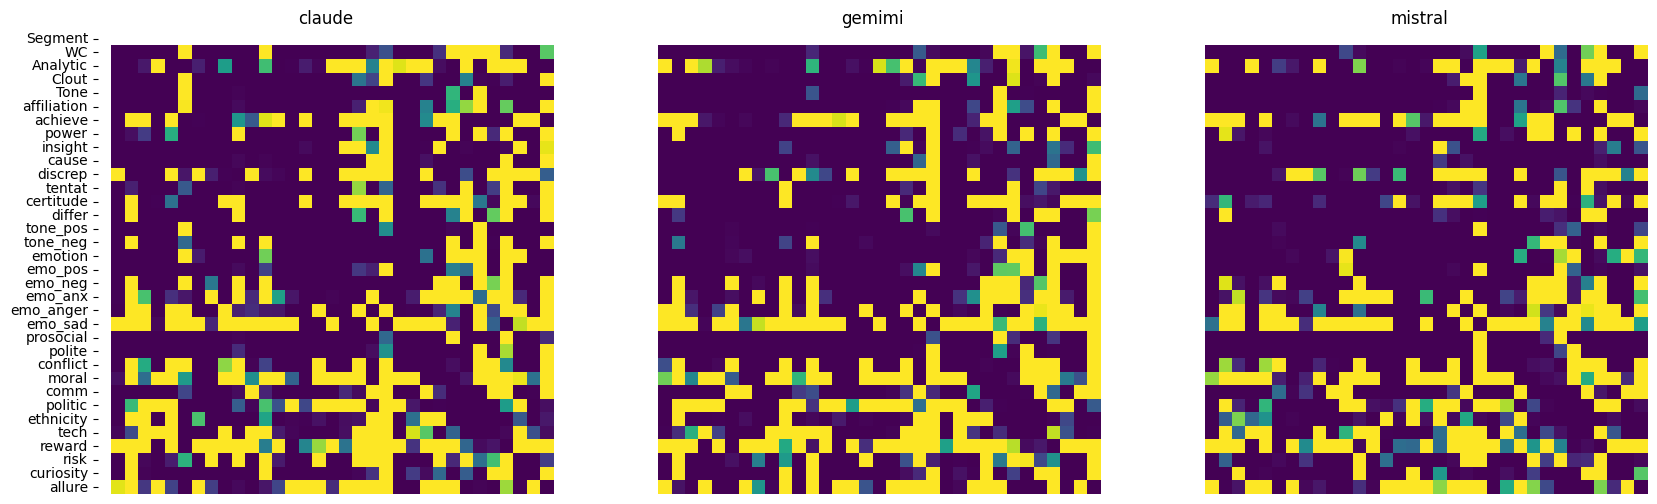

<Figure size 1000x600 with 0 Axes>

In [62]:
plt.style = 'ggplot' 
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
plt.figure(figsize=(10, 6))
   
for i,pval_matrix in enumerate(pvals):
    if i == 0:
        sns.heatmap(pval_matrix, annot=False, cmap='viridis', vmin=0, vmax=0.05,ax=axes[i], xticklabels=False, yticklabels=True,cbar=False)
        axes[i].set_title(llm_names[i])
    else:
        sns.heatmap(pval_matrix, annot=False, cmap='viridis', vmin=0, vmax=0.05,ax=axes[i], xticklabels=False, yticklabels=False,cbar=False)
        axes[i].set_title(llm_names[i])


Pearson Correlation of humans with LLMs

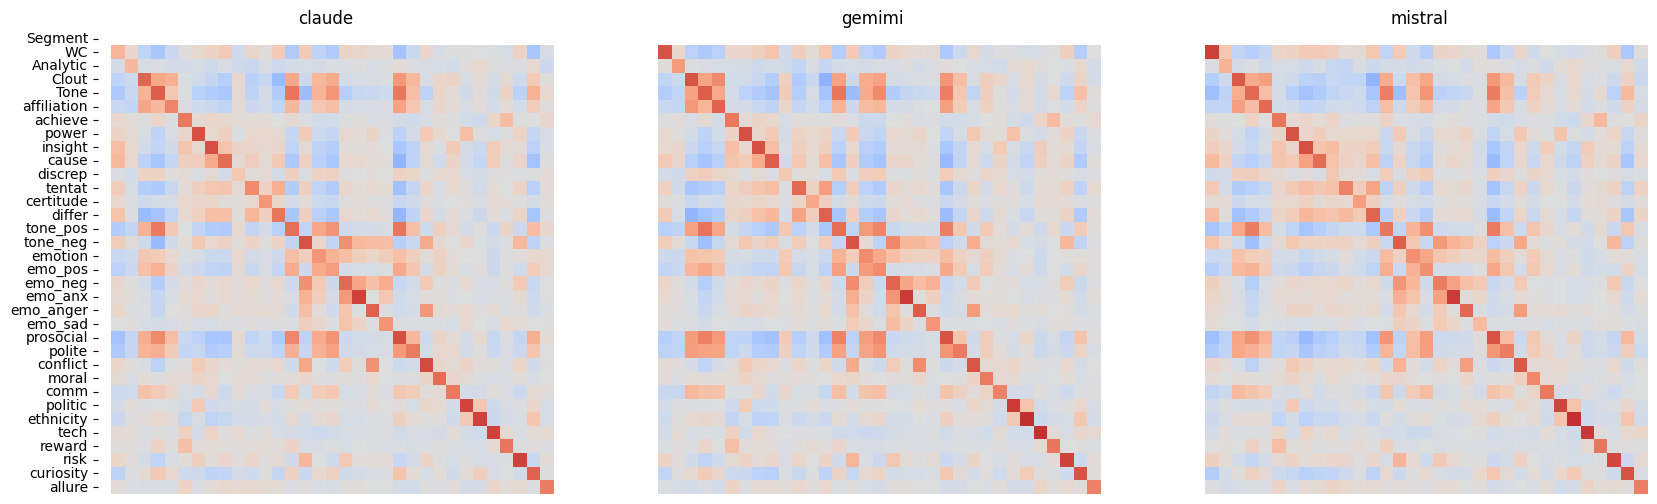

<Figure size 1000x600 with 0 Axes>

In [63]:
plt.style = 'ggplot' 
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
plt.figure(figsize=(10, 6))
   
for i,corr_matrix in enumerate(corrs):
    if i == 0:
        sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1,ax=axes[i], xticklabels=False, yticklabels=True,cbar=False)
        axes[i].set_title(llm_names[i])
    else:
        sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1,ax=axes[i], xticklabels=False, yticklabels=False,cbar=False)
        axes[i].set_title(llm_names[i])


In [26]:
df_corrs = pd.DataFrame(corrs).T
df_pvals = pd.DataFrame(pvals).T


In [32]:
df = pd.concat([df_corrs,df_pvals],axis=1)

In [34]:
df.columns = ['c_corr','g_corr','m_corr','c_pvals','g_pvals','m_pvals']

In [35]:
df['features']=columns

In [36]:
df

,c_corr,g_corr,m_corr,c_pvals,g_pvals,m_pvals,features
0,NaN,NaN,NaN,NaN,NaN,NaN,Segment
1,0.348013,0.797597,0.864065,4.139866e-97,0.000000e+00,0.000000e+00,WC
2,0.327695,0.488704,0.365290,1.112756e-85,4.741920e-203,1.610428e-107,Analytic
3,0.730756,0.796721,0.769913,0.000000e+00,0.000000e+00,0.000000e+00,Clout
4,0.753296,0.754955,0.716986,0.000000e+00,0.000000e+00,0.000000e+00,Tone
5,0.597244,0.734510,0.705075,0.000000e+00,0.000000e+00,0.000000e+00,affiliation
6,0.651417,0.653036,0.663896,0.000000e+00,0.000000e+00,0.000000e+00,achieve
7,0.810112,0.812480,0.802997,0.000000e+00,0.000000e+00,0.000000e+00,power
8,0.812949,0.805519,0.815536,0.000000e+00,0.000000e+00,0.000000e+00,insight
9,0.697878,0.754262,0.698802,0.000000e+00,0.000000e+00,0.000000e+00,cause


In [87]:
corr_matrix_latex = corr_matrix.to_latex(float_format="%.2f")
pval_matrix_latex = pval_matrix.to_latex(float_format="%.3f")

In [91]:
pval_matrix[]

,Segment_claude,WC_claude,Analytic_claude,Clout_claude,Tone_claude,affiliation_claude,achieve_claude,power_claude,insight_claude,cause_claude,...,conflict_claude,moral_claude,comm_claude,politic_claude,ethnicity_claude,tech_claude,reward_claude,risk_claude,curiosity_claude,allure_claude
Segment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WC,NaN,4.139866e-97,4.304860e-08,7.529829e-33,1.140774e-89,8.486136e-17,4.210628e-01,1.115838e-05,1.684400e-13,9.023589e-32,...,4.400151e-07,6.902341e-03,6.840950e-01,9.649272e-01,9.306657e-01,4.863080e-01,5.830479e-03,2.328899e-15,6.582716e-89,3.709732e-02
Analytic,NaN,1.306909e-04,1.112756e-85,3.211801e-03,9.620258e-02,1.587313e-04,1.062448e-04,4.220169e-03,2.974617e-09,2.768223e-02,...,6.380402e-02,1.667682e-03,7.231703e-07,1.227069e-01,1.241307e-05,6.544509e-01,2.764020e-01,2.405457e-01,1.192787e-05,7.439187e-14
Clout,NaN,3.852651e-32,1.153560e-12,0.000000e+00,2.572240e-149,1.930009e-116,1.329130e-01,3.177436e-09,2.770628e-23,9.523434e-55,...,7.714936e-03,3.641311e-10,2.814579e-11,2.185731e-02,4.796709e-04,3.374768e-04,3.919554e-03,5.482166e-11,6.509164e-33,4.923262e-01
Tone,NaN,3.653938e-77,9.258370e-19,1.251416e-108,0.000000e+00,1.368222e-40,4.077470e-01,5.374893e-48,6.379408e-70,4.363253e-84,...,3.976679e-39,1.901801e-10,3.265298e-02,2.771138e-07,4.950556e-02,1.208520e-07,2.344956e-12,1.100912e-39,1.599912e-109,1.074078e-05
affiliation,NaN,6.719963e-17,3.671961e-28,4.756939e-157,9.673217e-84,0.000000e+00,4.942663e-02,2.840764e-08,5.272861e-16,1.844251e-32,...,2.193453e-02,1.452443e-07,3.134907e-02,4.180020e-02,5.093617e-02,3.070402e-05,3.817933e-02,1.243647e-06,1.697190e-25,7.996875e-02
achieve,NaN,1.712763e-06,3.123421e-01,9.690069e-01,1.715595e-08,5.465400e-01,0.000000e+00,2.832216e-04,2.019193e-09,1.369304e-04,...,2.371891e-02,3.162597e-01,7.465858e-01,1.938929e-06,9.451159e-10,3.646230e-10,1.070024e-70,8.064565e-01,9.462235e-01,3.827013e-07
power,NaN,2.221360e-12,1.821966e-03,8.640430e-03,6.300201e-34,3.139562e-02,9.657808e-09,0.000000e+00,7.434594e-06,3.477421e-18,...,1.271602e-34,4.037278e-05,9.360055e-01,2.411691e-66,8.986930e-01,5.813022e-03,7.189440e-01,1.101356e-12,4.000424e-21,6.382997e-02
insight,NaN,7.681285e-68,2.071344e-05,6.993038e-06,6.419627e-28,1.071083e-07,9.425014e-47,1.688147e-06,0.000000e+00,8.034377e-49,...,3.243722e-04,1.181646e-01,4.413514e-31,5.015370e-04,1.170699e-14,2.527914e-29,9.395831e-04,1.719074e-01,4.443085e-41,4.814155e-02
cause,NaN,2.185857e-81,2.390108e-06,4.306769e-39,2.324439e-88,1.591753e-22,8.715980e-23,5.059727e-23,5.167238e-138,0.000000e+00,...,2.135646e-03,5.446219e-08,2.182732e-12,1.112201e-04,2.822898e-22,1.505763e-26,7.066761e-01,3.363230e-09,7.137091e-109,6.749765e-01


t-statistic values of statistically significant features (’Tone’, ’achieve’, ’cause’, ’emotion’,’emo pos’,’polite’,’curiosity’) which reflects gender gaps between human and LLM texts.

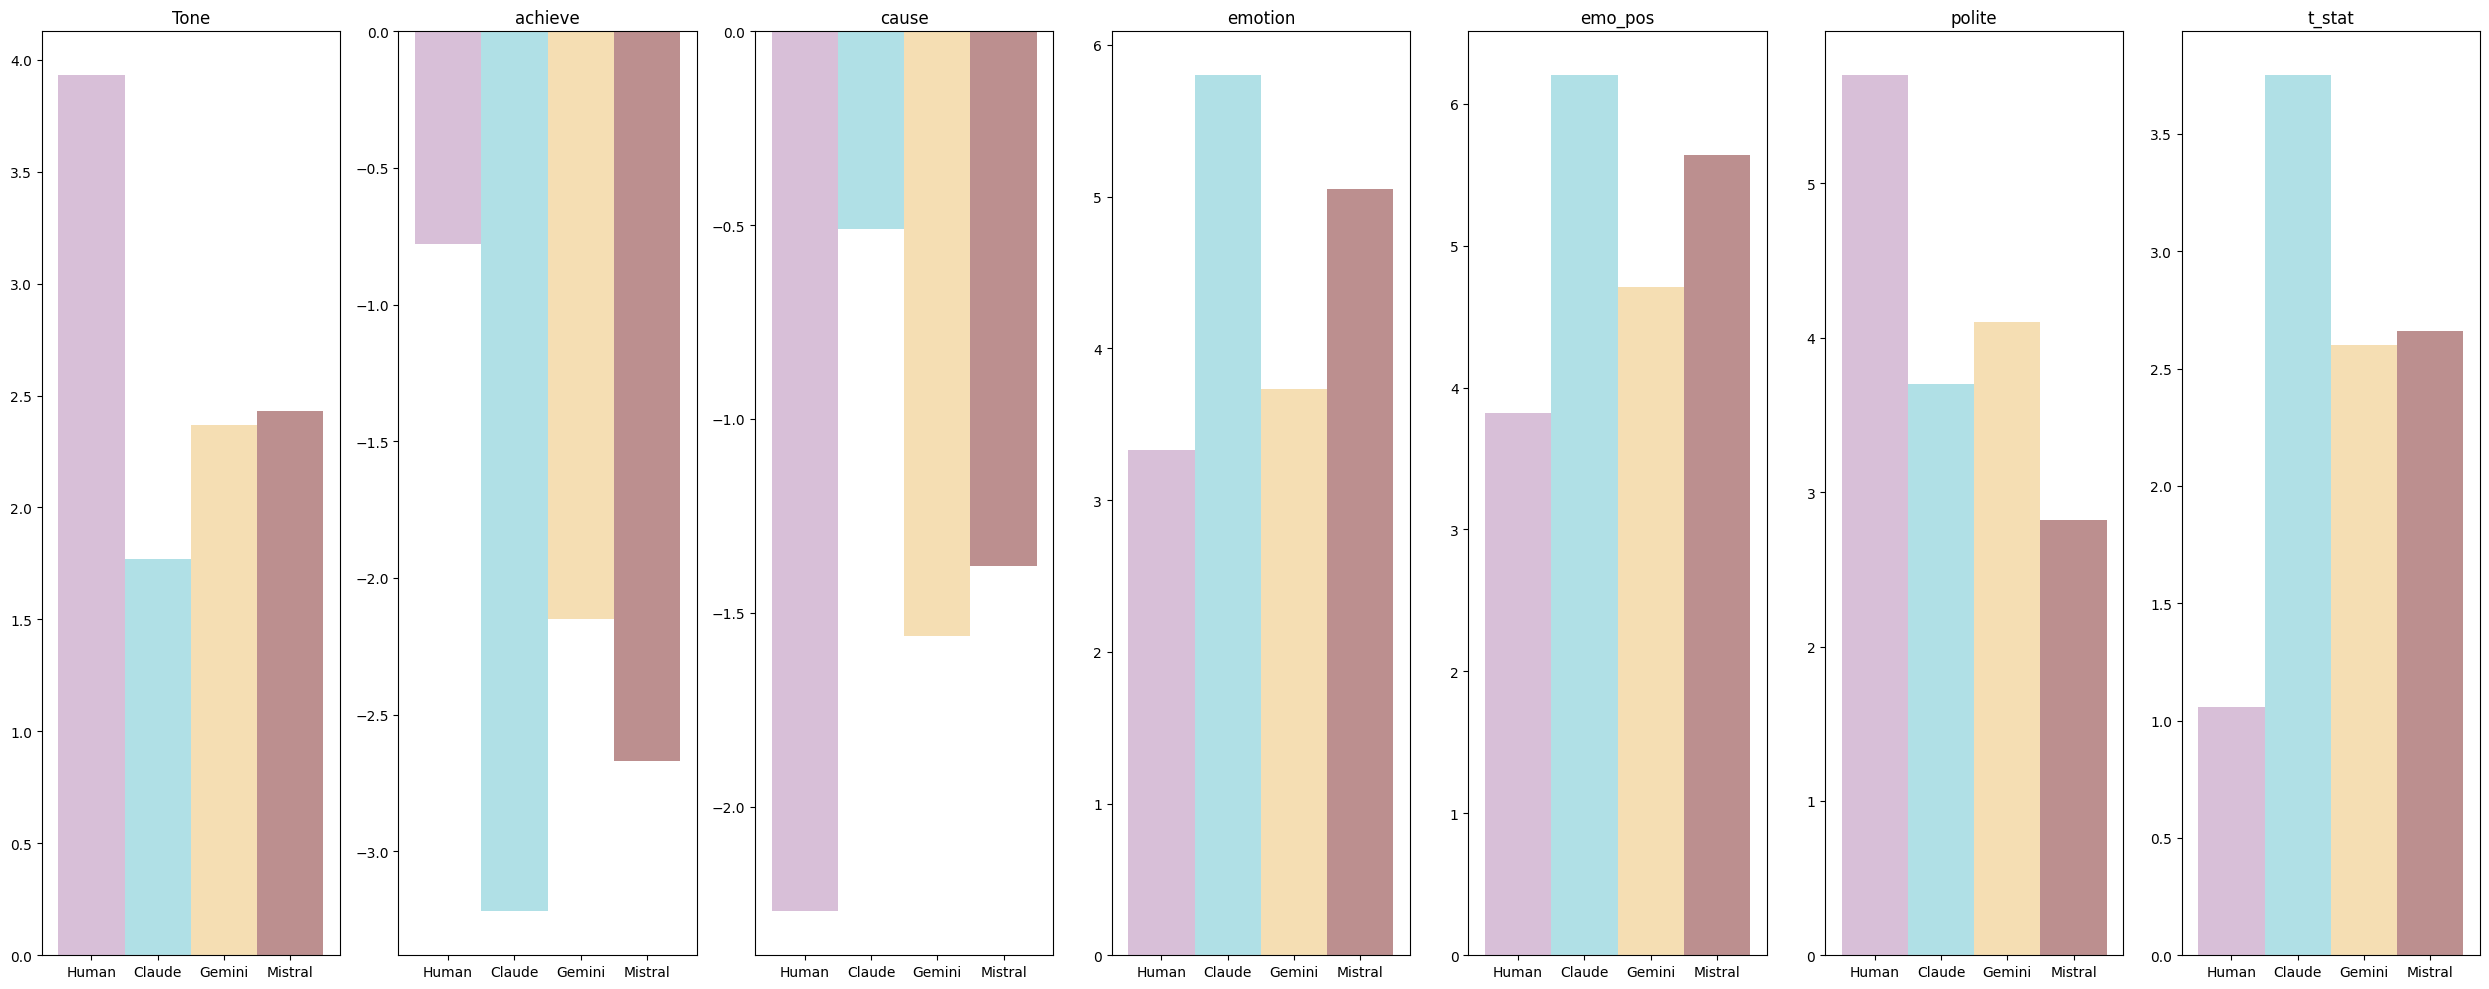

In [66]:
features_to_plot = ['Tone', 'achieve', 'cause', 'emotion', 'emo_pos','polite','curiosity']

fig, axes = plt.subplots(ncols=len(features_to_plot), nrows=1, figsize=(25, 10), sharex=True)

# Create a bar graph for each selected feature
for i, feature in enumerate(features_to_plot):
    df.loc[feature].plot(kind='bar', ax=axes[i],color=['thistle','powderblue','wheat','rosybrown'], width=1)
    axes[i].set_title(f'{feature}')
    axes[i].set_xlabel('') 
    axes[i].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.title('t_stat')
plt.show()